In [1]:
# Import the necessary libraries
import networkx as nx
import pylab as plt
import csv
import numpy as np
import pandas as pd

In [2]:
# Define the graph with networkx
G = nx.Graph()

In [3]:
# Reading the csv file for edge formation
with open('restaurant.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    i = 0
    for row in readCSV:
        if i != 0 :
            G.add_edges_from([(row[2],row[3]),(row[2],row[4])])
        i+=1

In [4]:
data = pd.read_csv('restaurant.csv')
#print(data.shape)
data.head()


,Horodateur,Score,Select your name,Select your first colleagues,Select scond colleagues
0,27/02/2020 15:25:00,NaN,Saliou FALL,Faith KIMONGO,Collins F. Owino OLOO
1,27/02/2020 15:26:11,NaN,KANINGINI LUTALA Netho Junior,Arnaud WATUSADISI MAVAKALA,Rosine Agatha Nathalie FAYE
2,27/02/2020 15:28:13,NaN,Collins F. Owino OLOO,Faith KIMONGO,Idowu Esther IJAODORO
3,27/02/2020 15:34:57,NaN,Arnaud WATUSADISI MAVAKALA,Arame THIAM,KANINGINI LUTALA Netho Junior
4,27/02/2020 15:36:20,NaN,Faith KIMONGO,Collins F. Owino OLOO,Saliou FALL


C:\Users\Science\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


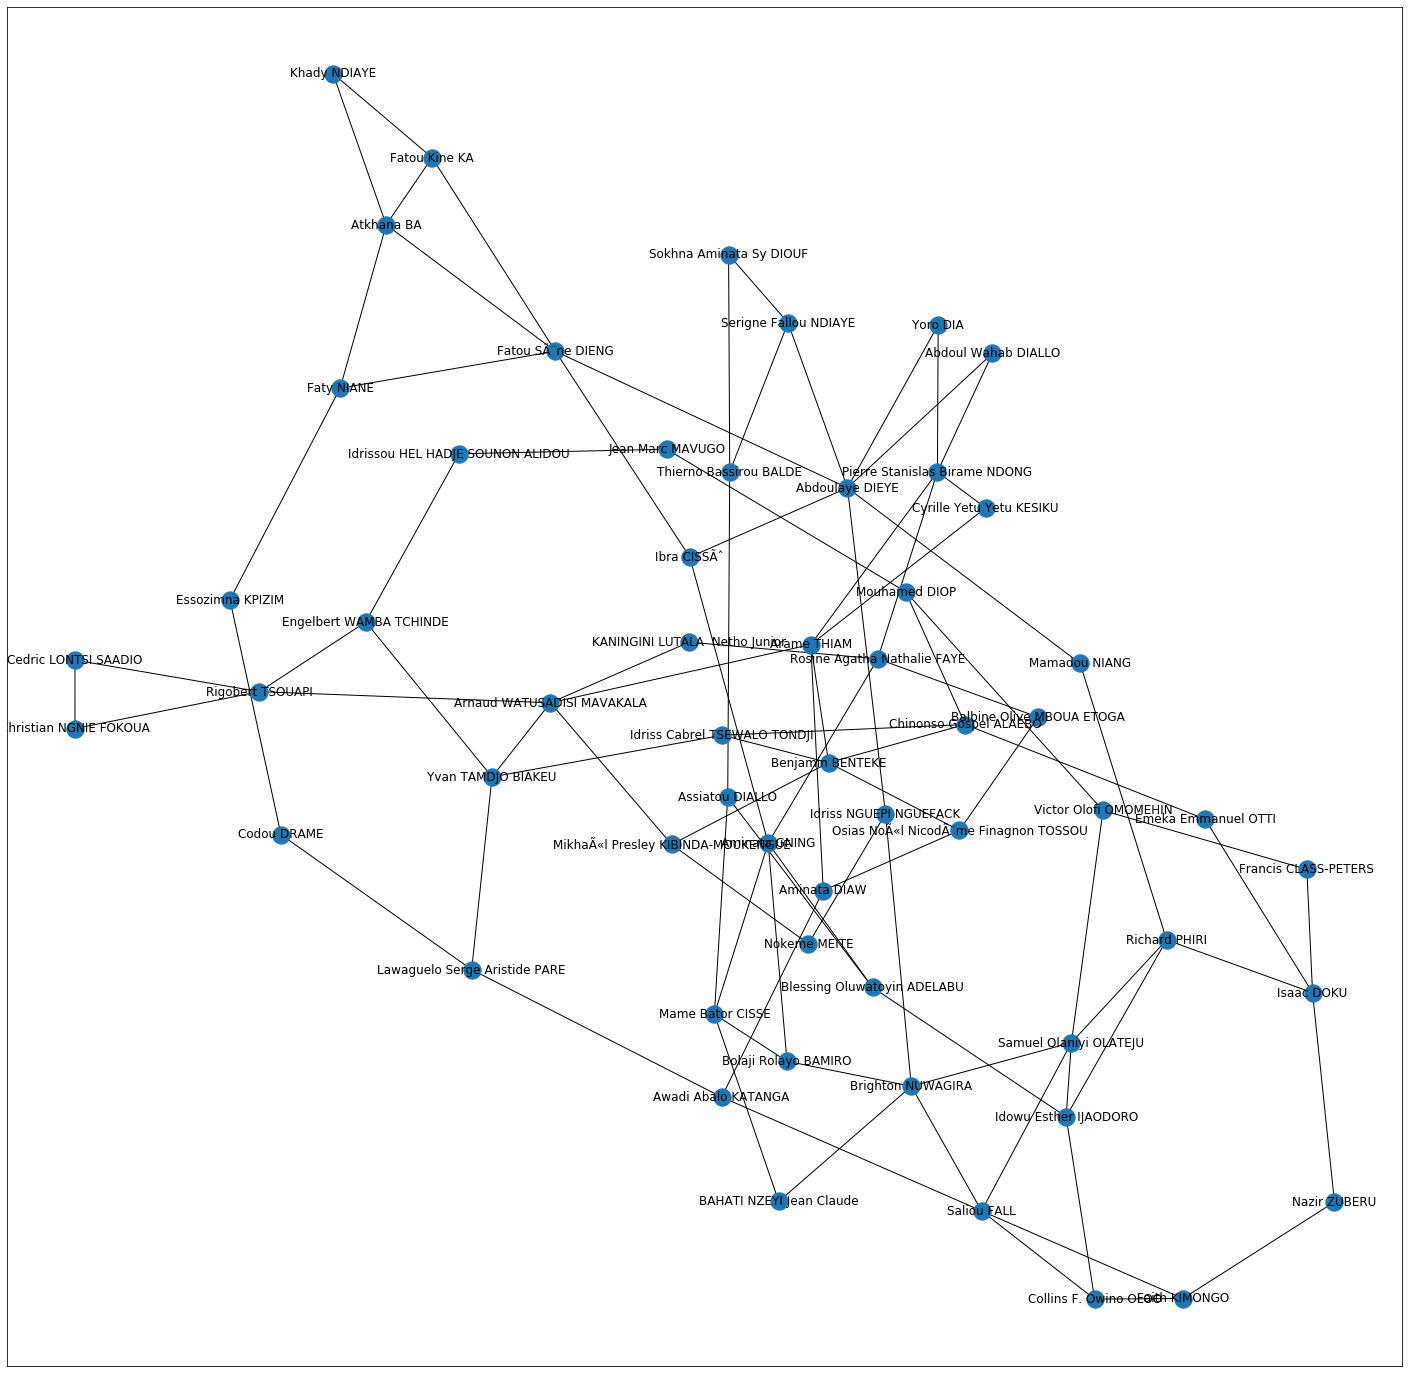

In [5]:
# Display of the graph
figure = plt.figure(figsize = (25, 25))
plt.show(nx.draw_networkx(G,with_labels = True,pos=nx.spring_layout(G)))
figure.savefig("restaurant.png",fmt="png",bbox_inches='tight', pad_inches=0.03,dpi=300)

In [6]:
# Compute the degree of every node: degrees
degrees = [len(list(G.neighbors(n))) for n in G.nodes()]

# Print the degrees
print(degrees)

[5, 3, 3, 2, 5, 4, 4, 5, 3, 3, 5, 2, 4, 2, 2, 4, 4, 3, 3, 4, 3, 3, 5, 2, 2, 5, 2, 3, 5, 5, 4, 3, 5, 3, 4, 3, 2, 3, 3, 7, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3, 4, 2, 3, 2, 2]


In [7]:
#Displays the 5 highest degree nodes 
t=pd.DataFrame(dict(G.degree()),index=range(1)).T
TT=t.sort_values(0,ascending=False)
TT.columns =['Degré']
TT.index.name='Noeud'
TT=TT.reset_index(level = ['Noeud'],inplace = False) 
TT.head(5)

,Noeud,Degré
0,Abdoulaye DIEYE,7
1,Saliou FALL,5
2,Benjamin BENTEKE,5
3,Fatou SÃ¨ne DIENG,5
4,Brighton NUWAGIRA,5


In [8]:
#closeness centrality
cc=pd.DataFrame(dict(nx.closeness_centrality(G)),index=range(1)).T
cc.sort_values(0,ascending=True)
cc.columns =['Centralité closeness']
cc.index.name='Noeuds'
cc=cc.reset_index(level = ['Noeuds'],inplace = False) 
#cc.head(5)
cc=cc.sort_values(by='Centralité closeness',ascending=False)#.iloc[:5,:]
cc.head(5)

,Noeuds,Centralité closeness
28,Brighton NUWAGIRA,0.303191
39,Abdoulaye DIEYE,0.300000
38,Idriss NGUEPI NGUEFACK,0.300000
29,Aminata GNING,0.295337
7,Arame THIAM,0.293814


In [9]:
#betweenness centrality
bc=pd.DataFrame(dict(nx.betweenness_centrality(G)),index=range(1)).T
bc.sort_values(0,ascending=False)
bc.columns =['Centralité betweenness']
bc.index.name='Noeuds'
bc=bc.reset_index(level = ['Noeuds'],inplace = False) 
#bc.head(5)
bc=bc.sort_values(by='Centralité betweenness',ascending=False)#.iloc[:5,:]
bc.head(5)

,Noeuds,Centralité betweenness
39,Abdoulaye DIEYE,0.228718
4,Arnaud WATUSADISI MAVAKALA,0.142153
29,Aminata GNING,0.130493
32,Fatou SÃ¨ne DIENG,0.130184
7,Arame THIAM,0.115752


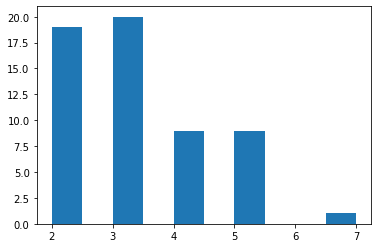

In [10]:
# Compute the degree centrality of the Twitter network: deg_cent
deg_cent = nx.degree_centrality(G)
# Plot a histogram of the degree distribution of the graph
plt.figure()
plt.hist([len(list(G.neighbors(n))) for n in G.nodes()])
plt.show()


### Individual relays

In [11]:
print([p for p in nx.all_shortest_paths(G, source="Abdoulaye DIEYE", target="Arnaud WATUSADISI MAVAKALA")])

[['Abdoulaye DIEYE', 'Idriss NGUEPI NGUEFACK', 'Nokeme MEITE', 'MikhaÃ«l Presley KIBINDA-MOUKENGUE', 'Arnaud WATUSADISI MAVAKALA'], ['Abdoulaye DIEYE', 'Abdoul Wahab DIALLO', 'Pierre Stanislas Birame NDONG', 'Arame THIAM', 'Arnaud WATUSADISI MAVAKALA'], ['Abdoulaye DIEYE', 'Yoro DIA', 'Pierre Stanislas Birame NDONG', 'Arame THIAM', 'Arnaud WATUSADISI MAVAKALA']]


In [12]:
print("Distance: \n", nx.floyd_warshall_numpy(G, nodelist=None, weight='weight'))
print("Eccentricity: \n", nx.eccentricity(G)) 
print("Radius: \n", nx.radius(G)) 
print("Center: \n", list(nx.center(G)))
print("Weiner index: \n", nx.wiener_index(G, weight=None)) 

Distance: 
 [[0. 1. 1. ... 5. 6. 2.]
 [1. 0. 1. ... 6. 7. 3.]
 [1. 1. 0. ... 6. 7. 3.]
 ...
 [5. 6. 6. ... 0. 1. 5.]
 [6. 7. 7. ... 1. 0. 6.]
 [2. 3. 3. ... 5. 6. 0.]]
Eccentricity: 
 {'Saliou FALL': 6, 'Faith KIMONGO': 7, 'Collins F. Owino OLOO': 7, 'KANINGINI LUTALA  Netho Junior': 7, 'Arnaud WATUSADISI MAVAKALA': 7, 'Rosine Agatha Nathalie FAYE': 6, 'Idowu Esther IJAODORO': 7, 'Arame THIAM': 6, 'Osias NoÃ«l NicodÃ¨me Finagnon TOSSOU': 7, 'Aminata DIAW': 7, 'Benjamin BENTEKE': 7, 'Nazir ZUBERU': 8, 'Isaac DOKU': 7, 'Christian NGNIE FOKOUA': 9, 'Cedric LONTSI SAADIO': 9, 'Rigobert TSOUAPI': 8, 'Yvan TAMDJO BIAKEU': 7, 'Lawaguelo Serge Aristide PARE': 7, 'Assiatou DIALLO': 7, 'Mame Bator CISSE': 7, 'Blessing Oluwatoyin ADELABU': 6, 'Victor Olofi OMOMEHIN': 7, 'Samuel Olaniyi OLATEJU': 7, 'Francis CLASS-PETERS': 7, 'Cyrille Yetu Yetu KESIKU': 6, 'Pierre Stanislas Birame NDONG': 6, 'Yoro DIA': 6, 'Bolaji Rolayo BAMIRO': 6, 'Brighton NUWAGIRA': 6, 'Aminata GNING': 6, 'Richard PHIRI': 8, '

Il exite toujour dans un réseaux social des gens qui sont nettement plus populaires que les autres. Ils sont généralement très peu nombreux et sont de loin plus populaires que les autres. La première et la plus simple des mesures que nous utilisons nous aidera à trouver ces célébrités locales

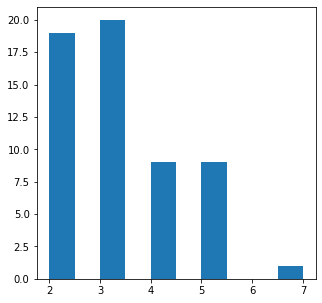

In [13]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt
# Compute the degree centrality of the Twitter network: deg_cent
deg_cent = nx.degree_centrality(G)
# Plot a histogram of the degree distribution of the graph
figure = plt.figure(figsize = (5,5))
#plt.figure()
plt.hist([len(list(G.neighbors(n))) for n in G.nodes()])
plt.show()


In [14]:
#print("Clustering: \n",  nx.clustering(G))
print("global clustering: \n", nx.average_clustering(G))
print(" Average  path length: \n", nx.average_shortest_path_length(G))
degrees = [len(list(G.neighbors(n))) for n in G.nodes()] 
print("Degree distribution: \n", degrees)

global clustering: 
 0.18817733990147778
 Average  path length: 
 4.055051421657592
Degree distribution: 
 [5, 3, 3, 2, 5, 4, 4, 5, 3, 3, 5, 2, 4, 2, 2, 4, 4, 3, 3, 4, 3, 3, 5, 2, 2, 5, 2, 3, 5, 5, 4, 3, 5, 3, 4, 3, 2, 3, 3, 7, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3, 4, 2, 3, 2, 2]


In [15]:
degrees = [len(list(G.neighbors(n))) for n in G.nodes()] 
print("Degree distribution: \n", degrees)

Degree distribution: 
 [5, 3, 3, 2, 5, 4, 4, 5, 3, 3, 5, 2, 4, 2, 2, 4, 4, 3, 3, 4, 3, 3, 5, 2, 2, 5, 2, 3, 5, 5, 4, 3, 5, 3, 4, 3, 2, 3, 3, 7, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3, 4, 2, 3, 2, 2]


In [16]:
deg=nx.degree(G) 
# calcul des degrés des nœuds du graphe g
bet=nx.betweenness_centrality(G)  
# calcul des centralités
aspl=nx.average_shortest_path_length(G)
print(aspl) # consultation des éloignements moyens

4.055051421657592


### Community detection

In [17]:
import networkx.algorithms.community as nxcom
# Find the communities
communities = sorted(nxcom.greedy_modularity_communities(G), key=len, reverse=True)
# Count the communities
len(communities)

8

In [18]:
def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1
            
def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0

In [19]:
def get_color(i, r_off=1, g_off=1, b_off=1):
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)

In [20]:
 #Set node and edge communities
set_node_community(G, communities)
set_edge_community(G)

# Set community color for nodes
node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]

# Set community color for internal edges
external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
internal_color = [get_color(G.edges[e]['community']) for e in internal]

C:\Users\Science\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\Science\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):


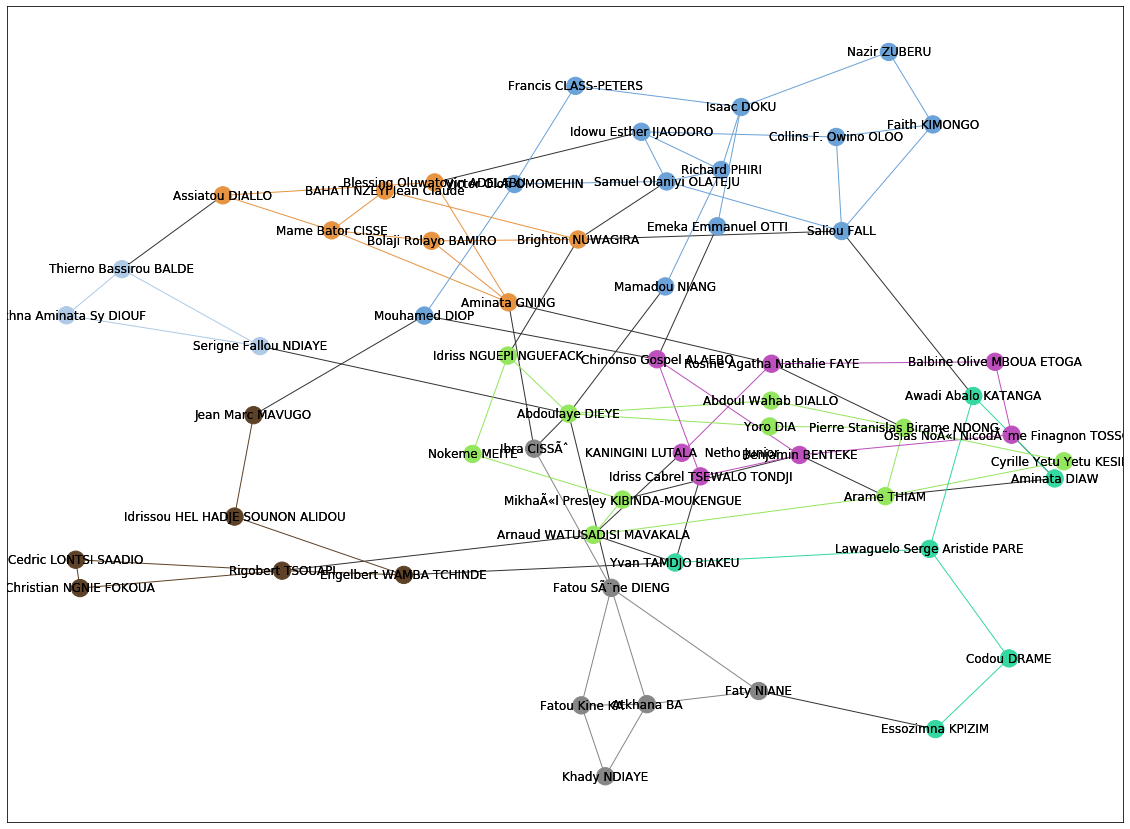

In [21]:
pos = nx.spring_layout(G)
plt.figure(figsize=(20, 15))
# Draw external edges
nx.draw_networkx(
    G,
    pos=pos,
    node_size=0,
    edgelist=external,
    edge_color="#333333")
# Draw nodes and internal edges
nx.draw_networkx(
    G,
    pos=pos,
    node_color=node_color,
    edgelist=internal,
    edge_color=internal_color)